In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

# pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

# 모델
model_file = '/home/gnorm42/study_ipynb/aiffel_fuckseg/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)


2025-02-03 01:16:49.087542: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-02-03 01:16:50.461681: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-03 01:16:50.463120: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-02-03 01:16:50.464784: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-02-03 01:16:50.621858: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-02-03

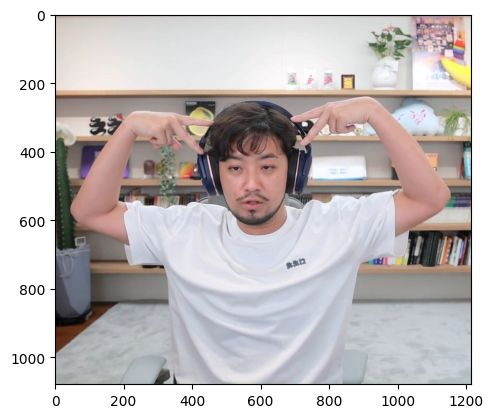

2025-02-03 01:17:03.364864: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2025-02-03 01:17:03.365455: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3700035000 Hz


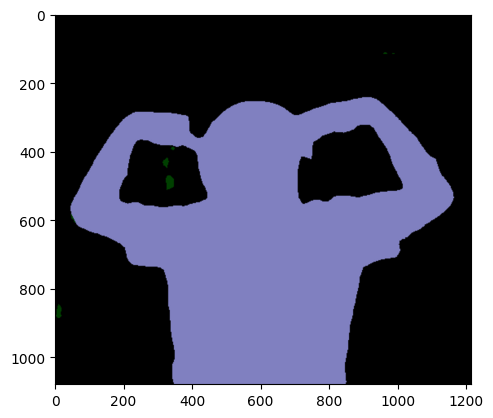

감지된 객체들: ['background', 'person', 'pottedplant']

현재 처리중인 객체: background


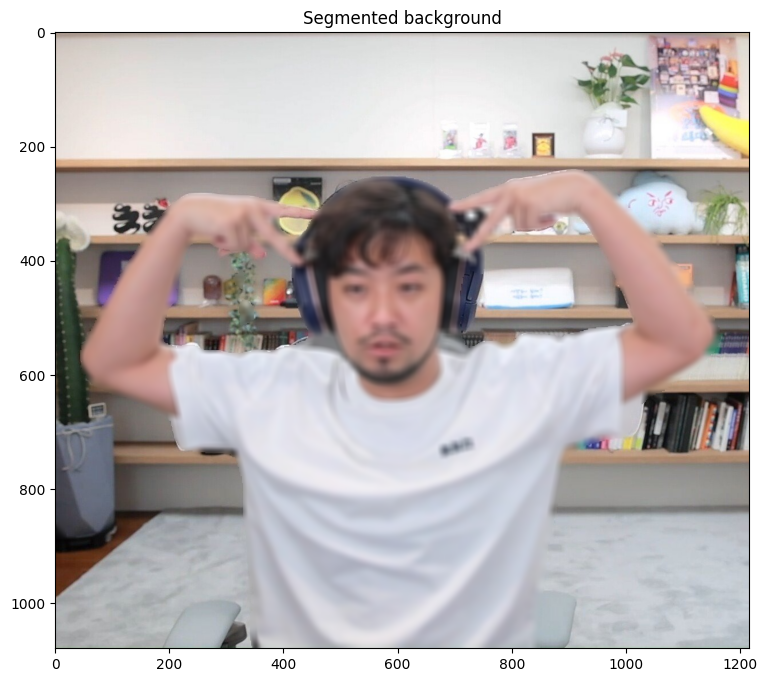


현재 처리중인 객체: person


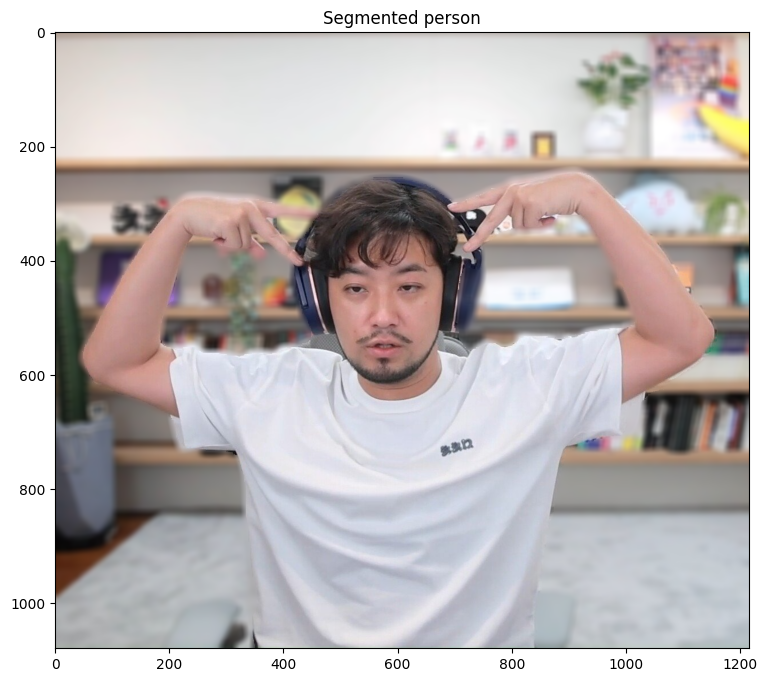


현재 처리중인 객체: pottedplant


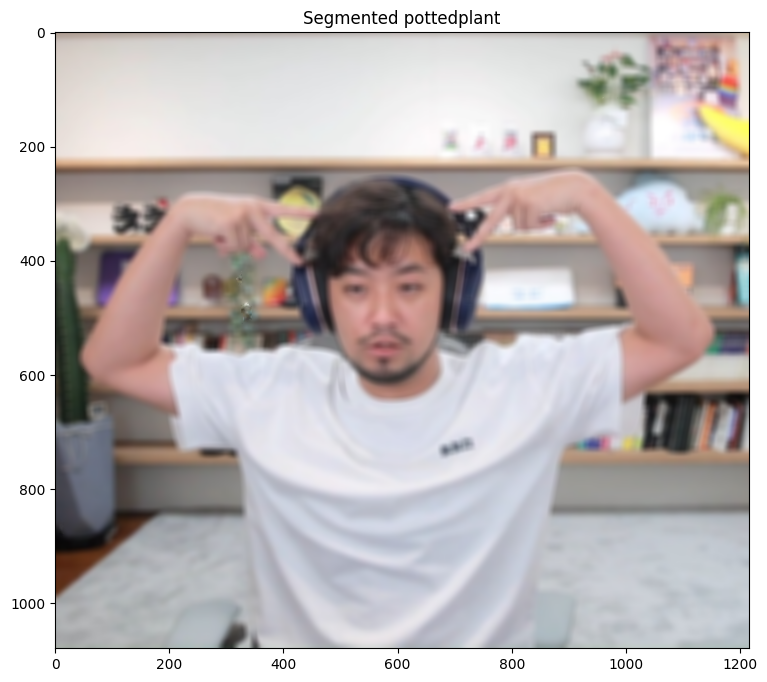

In [2]:

img_path = '/home/gnorm42/study_ipynb/aiffel_fuckseg/images/7007290122_494354581_ac24b93febbf0f945090a1f583f8f8e6.jpg'  # 처리할 이미지 경로만 지정
img_orig = cv2.imread(img_path)

# 원본 이미지 출력
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 세그멘테이션 수행
segvalues, output = model.segmentAsPascalvoc(img_path)
plt.imshow(output)
plt.show()

# 컬러맵 생성
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)
for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

# 감지된 객체 처리
detected_classes = segvalues['class_ids']
print("감지된 객체들:", [LABEL_NAMES[class_id] for class_id in detected_classes])

for class_id in detected_classes:
    print(f"\n현재 처리중인 객체: {LABEL_NAMES[class_id]}")
    
    # RGB 값 계산 및 마스크 생성
    target_rgb = colormap[class_id]
    seg_color = (int(target_rgb[2]), int(target_rgb[1]), int(target_rgb[0]))
    seg_map = np.all(output==seg_color, axis=-1)
    img_mask = seg_map.astype(np.uint8) * 255
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    
    # 배경 블러 처리
    img_orig_blur = cv2.blur(img_orig, (13,13))
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    
    # 결과 이미지 생성 및 출력
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    plt.figure(figsize=(10,8))
    plt.title(f"Segmented {LABEL_NAMES[class_id]}")
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()

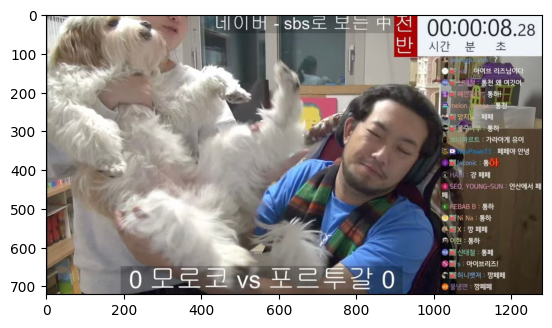

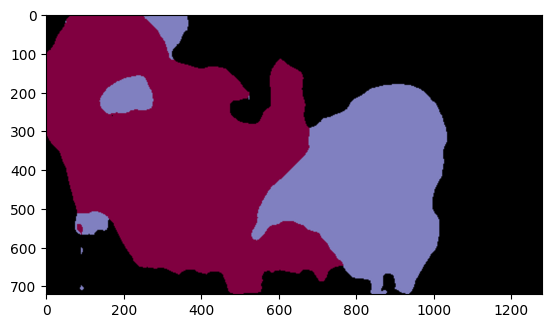

감지된 객체들: ['background', 'dog', 'person']

현재 처리중인 객체: background


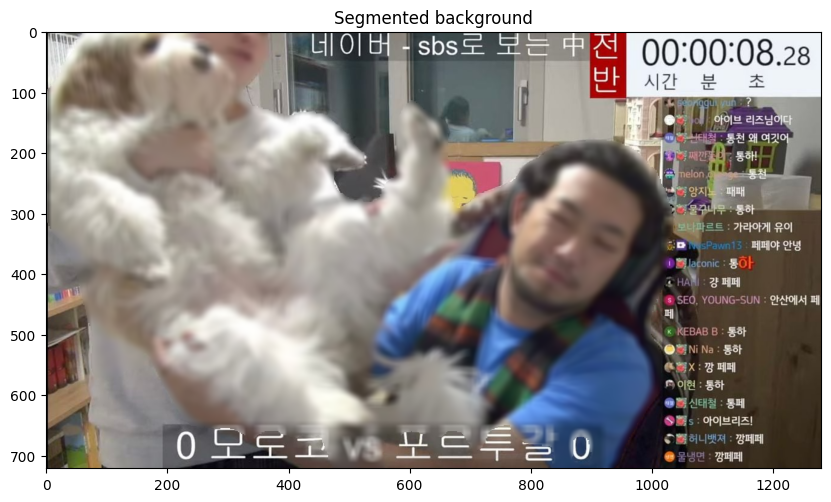


현재 처리중인 객체: dog


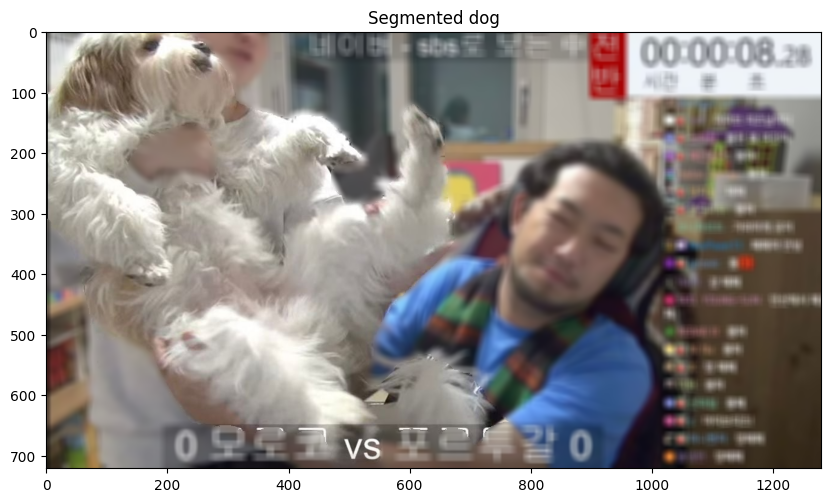


현재 처리중인 객체: person


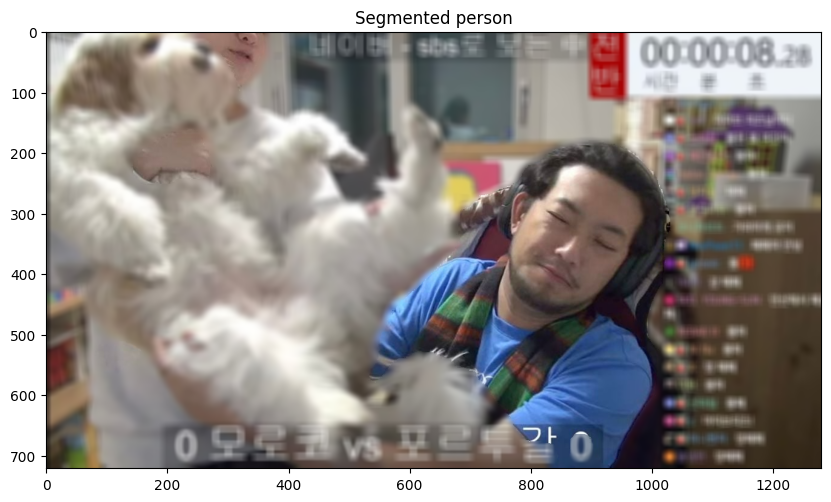

In [4]:

img_path = '/home/gnorm42/study_ipynb/aiffel_fuckseg/images/1670770847506-zkn9f6noh2.jpg'  # 처리할 이미지 경로만 지정
img_orig = cv2.imread(img_path)

# 원본 이미지 출력
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 세그멘테이션 수행
segvalues, output = model.segmentAsPascalvoc(img_path)
plt.imshow(output)
plt.show()

# 컬러맵 생성
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)
for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

# 감지된 객체 처리
detected_classes = segvalues['class_ids']
print("감지된 객체들:", [LABEL_NAMES[class_id] for class_id in detected_classes])

for class_id in detected_classes:
    print(f"\n현재 처리중인 객체: {LABEL_NAMES[class_id]}")
    
    # RGB 값 계산 및 마스크 생성
    target_rgb = colormap[class_id]
    seg_color = (int(target_rgb[2]), int(target_rgb[1]), int(target_rgb[0]))
    seg_map = np.all(output==seg_color, axis=-1)
    img_mask = seg_map.astype(np.uint8) * 255
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    
    # 배경 블러 처리
    img_orig_blur = cv2.blur(img_orig, (13,13))
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    
    # 결과 이미지 생성 및 출력
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    plt.figure(figsize=(10,8))
    plt.title(f"Segmented {LABEL_NAMES[class_id]}")
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.show()